# OpenCV - Advanced
Video Referenced : https://www.youtube.com/watch?v=oXlwWbU8l2o (2:28:50)

## Imports

In [3]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

## Color Spaces
- Basically a space of colours, a system of representing an array of pixel colour.
- RGB, Grayscale are examples of colour spaces.
- OpenCV by default reads images as BGR which, outside of OpenCV is not the current system of representing colours (RGB).
- Displaying an image with a library (such as matplotlib) that isn't OpenCV will result in an inversion of colours. 
- We can hence also convert from BGR to RGB (See example 4)

1. Converting an image from BGR (Default) to Grayscale
    - Uses the cvtColor() function that takes in the image and the color code for conversion.

2. Converting an image from BGR to HSV
    - HSV - Hue Saturation Value that is sort of based on how humans think and conceive colour.
    - Uses the same cvtColor() but with a different colour code compared to grayscale conversion.

3. Converting an image from BGR to LAB
    - Again uses the same cvtColor() but with a different colour code.

4. Converting an image from BGR to RGB
    - Again uses the same cvtColor() but with a different colour code.
    - However, if displayed using OpenCV, this will result in an inverse color image.

- These conversions can be reversed but converting from one to another (eg. grayscale to hsv) cannot be done directly.
- The images must be first converted back to BGR.


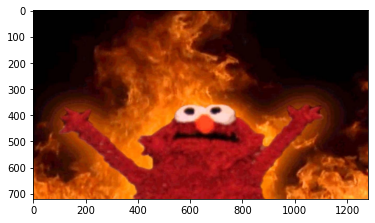

-1

In [5]:
parent_dir = os.getcwd()
photo_dir = os.path.join(parent_dir,"sample_photos")
photos = os.listdir(photo_dir)

img = cv.imread(os.path.join(photo_dir,photos[0]))

# Converting from BGR to Grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Converting from BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Converting from BGR to LAB
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)

# Converting from BGR to RGB
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

cv.imshow("Grayscale", gray)
cv.imshow("HSV", hsv)
cv.imshow("LAB", lab)
cv.imshow("RGB", rgb)

plt.imshow(rgb)
plt.show()
cv.waitKey(0)

## Color Channels
- A coloured image consist of multiple channels: Red, Green, Blue.
- OpenCV allows to split an image into its respective color channels and later also merging color channels into a single image.

### Splitting
- Uses the split() function.
- The returned images are depicted in grayscale that show the intensity of the pixel values (eg. for blue, lighter areas will show high intensity of blue pixels)

### Merging
- Uses the merge() function which takes in a list of the individual channels.

### Viewing the actual colours involved in the channel rather than grayscale
- Requires reconstructing the image.
- Create a blank image using numpy (zero matrix)
- We can then merge the individual channels with the blank image matrix.
- This enables us to display only the specific channels while the rest of the image is black.
- Eg. for blue, we would pass in the list of \[blue, blank, blank]



In [7]:
img = cv.imread(os.path.join(photo_dir,photos[0]))

b,g,r = cv.split(img)

merged = cv.merge([b,g,r])

blank = np.zeros(img.shape[:2], dtype="uint8")

blue = cv.merge([b,blank,blank])
red = cv.merge([blank,blank,r])

cv.imshow("Blue", blue)
cv.imshow("Red", red)
cv.imshow("Merged Back", merged)
cv.waitKey(0)


-1

## Smoothing and Blurring
- We smooth an image when it has a lot of noise caused by camera sensors, lighting conditions etc.
- We can smooth an image to reduce the noise by applying blur to the image.
- One of the popular methods is to apply Gaussian Blur to the image.
- However, it may not  suit all purposes and hence there are multiple others that we could apply.

### What happens when we attempt to apply a blur?
- We first define a kernel or a window that we draw over a specific portion of an image.
- Within this window, something can be applied to the pixels of the image.
- The size of this window is said to be the kernel size which are the number of rows and columms the window has.
    - Eg. a window with 3 columns and 3 rows can be said to have a kernel size of 3x3.
- Higher kernel size = more blur the image will have.
- Blur is applied to the middle pixel as a result of the pixels around it (surrounding pixels)
- This window slides throughout the image to process the entire image.
- With this in mind, we can proceed to the different methods of blurring.

### Averaging
- A kernel is defined.
- The pixel intensity of the middle pixel is computed as the average of the intensities of the surrounding pixels.
- To perform this in OpenCV, we use the blur() function and pass in the image and the kernel size.

### Gaussian Blur
- Does the same thing as averaging but instead of averaging the surrounding pixel intensity, the surrounding pixels are given a weight and the products of these weigths are averaged for the middle value.
- Less blurring occurs but is more natural compared to the averaging method.
- Uses the GaussianBlur() method.

### Median Blurring
- Instead of taking the average of the surrounding pixels, we take the median of the pixels.
- Generally more effective in reducing noise.
- Good at reducing salt and pepper noise.
- Tend to be used in advanced CV projects.
- Uses the medianBlur() method but instead of passing in a tuple for the kernel size, just pass an integer (OpenCV assumes a square kernel)

### Bilateral
- Most effective blurring method.
- Applies blurring but retains the edges in the image.
- Uses the bilateralFilter() method which takes in:
    - The image
    - Diameter for pixel neighborhood (notice this is not kernel)
    - sigmaColor - larger value = more colours in the neighborhood to be considered.
    - sigmaSpace - larger value = pixels further away from the center will influence the blurring calculation.


In [9]:
img = cv.imread(os.path.join(photo_dir,photos[1]))

# Averaging
average = cv.blur(img, (3,3))
cv.imshow("Average Blur", average)

# Gaussian Blur
gaussian = cv.GaussianBlur(img, (3,3), 0)
cv.imshow("Gaussian Blur", gaussian)

# Median Blurring
median = cv.medianBlur(img, 3)
cv.imshow("Median Blur", median)

# Bilateral
bilateral = cv.bilateralFilter(img, 5, 15, 15)
cv.imshow("Bilateral Blur", bilateral)

cv.waitKey(0)

-1

## Bitwise Operations
- There are 4 basic bitwise operators: AND, OR, NOT, XOR.
- Used in image processing especially when working with masks.
- At high level, bitwise operators work in a binary manner where a pixel can be said to be turned off when it has a vakue of 0 and be turned on when it has a value of 1.

### AND Operator
- Takes in two images and returns the intersection of the images.
- Uses the bitwise_and() method.

### OR Operator
- Takes in two images and returns both the intersecting and non-intersecting parts of the image.
- Uses the bitwise_or() method.

### XOR Operator
- Good for returning just the non-intersecting regions of two images.
- Uses the bitwise_xor() method.

### NOT Operator
- Does not return anything but inverses the binary color (white pixels become black, black pixels become white)

In [11]:
blank = np.zeros((400,400), dtype="uint8")

rectangle = cv.rectangle(blank.copy(), (50,50), (350,350), 255, -1)
circle = cv.circle(blank.copy(), (200,200), 200, 255, -1)

cv.imshow("Rectangle", rectangle)
cv.imshow("Circle", circle)

bitwise_and = cv.bitwise_and(rectangle, circle)
bitwise_or = cv.bitwise_or(rectangle, circle)
bitwise_xor = cv.bitwise_xor(rectangle, circle)
rectangle_not = cv.bitwise_not(rectangle)

cv.imshow("AND", bitwise_and)
cv.imshow("OR", bitwise_or)
cv.imshow("XOR", bitwise_xor)
cv.imshow("NOT", rectangle_not)

cv.waitKey(0)

-1

## Masking
- Using bitwise operations, we can perform masking which allows us to focus on certain parts of an image.
- This could be used to remove unwanted parts of an image.
- In order to perform masking, we have to create a blank image that has the same dimensions as our image (can use the shape attribute)
    - Within this blank image, we can create a mask. In this example, we create a circle.
    - In order to mask the image, we can then use bitwise operators that take in the image and the mask.
    - For example, if we were to use the AND operator and the circle mask, we would get the intersecting parts of the image with the mask as a result.
- This could hence be done with any other shape created through other bitwise operations.


In [13]:
img = cv.imread(os.path.join(photo_dir,photos[1]))
height = img.shape[0]
width = img.shape[1]


blank = np.zeros(img.shape[:2], dtype="uint8")
mask = cv.circle(blank.copy(), (width//2, height//2), 200, 255, -1)

masked_image = cv.bitwise_and(img, img, mask=mask)

cv.imshow("Mask", mask)
cv.imshow("Masked Image", masked_image)
cv.waitKey(0)


-1

## Computing Histograms
- Histograms allow to visualise the distributions of pixel intensities in an image. (This can be coloured, grayscale, etc.)
- Useful in analysing an image and trying to equalise the image in order to reduce peaking.

1. Computing Histograms for Grayscale Images
- Convert the image to grayscale using cvtColor()
- Use the calcHist() method which takes in:
    - Images in the form of a list.
    - The number of color channels for each image in the form of a list (0 for grayscale)
    - The mask if we want to mask the image (None if no mask)
    - histSize - number of bins that is used to compute the histogram.
    - ranges of pixel values.
- We can lastly plot this histogram using matplotlib.
- The histogram can be interpreted as at the x value, there are y number of pixels with intensity x.

2. Computing Histograms for Coloured Images
- Uses the same calcHist() method but requires iterating over the color channels to individually compute the histogram for the color channels.

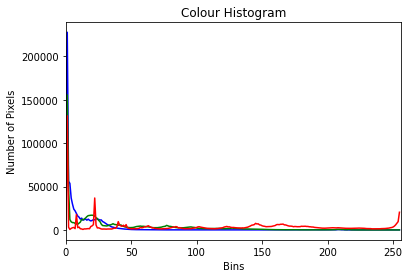

In [15]:
img = cv.imread(os.path.join(photo_dir,photos[0]))

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Grayscale Histogram
# gray_hist = cv.calcHist([gray], [0], None, [256], [0,256])

# plt.figure()
# plt.title("Grayscale Histogram")
# plt.xlabel("Bins")
# plt.ylabel("Number of Pixels")
# plt.plot(gray_hist)
# plt.xlim([0,256])

# Coloured Histogram
cv.imshow("Original Image", img)
cv.waitKey(0)

plt.figure()
plt.title("Colour Histogram")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")

colors = ('b','g','r')

for i,col in enumerate(colors):
    hist = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])

plt.show()

## Thresholding
- Binarising an image where pixels are either 0 (black) or 255 (white)
- An example is to take an image and compare each pixel to a threshold value where:
    - If it is below the threshold value, it is set to 0.
    - If it is above the threshold value, it is set to 255.

1. Simple Thresholding
- Uses the threshold() method which takes in:
    - the grayscale image
    - the threshold value
    - the maximum value (what value do we want to convert values that exceed the threshold value to)
    - the thresholding type (THRESH_BINARY, THRESH_BINARY_INV etc.)
- Returns:
    - threshold which is the same value we passed in
    - the thresholded image

2. Adaptive Thresholding
- Different threshold values result in different images.
- The downside of this in simple thresholding is that we have to manually define a threshold value.
- Adaptive thresholding gets the computer to find the optimal thresholding value by itself.
- Uses the adaptiveThreshold() method which takes in:
    - The source image
    - The maximum value (note no threshold value)
    - adaptiveMethod
    - thresholding type (similar to simple thresholding)
    - block size (kernel size used to compute the mean value of neigbouring pixels)
    - c value (subtracted from the mean to fine tune the value)
- Note that we don't necessarily have to use the mean value and hence this is where the adaptive method can be changed.
    

In [18]:
img = cv.imread(os.path.join(photo_dir,photos[0]))
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("Gray", gray)

# Simple Thresholding
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY)
cv.imshow("Simple Thresholding", thresh)

# Adaptive Thresholding
adaptive_threshold = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 3)
cv.imshow("Adaptive Thresholding", adaptive_threshold)

cv.waitKey(0)

-1

## Edge Detection
- Gradients can be seen as edge-like regions that are present in an image (However, they are not the same thing)
- A previously seen method involved the Canny() method which uses an algorithm to compute edges.
- There are other ways to compute edges.

1. Laplacion



In [22]:
img = cv.imread(os.path.join(photo_dir,photos[0]))
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("Gray", gray)

lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv.imshow("Laplacian", lap)


cv.waitKey(0)

-1